In [2]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import os
# Defina a localização que você deseja baixar (Fortaleza, Ceará)
def load_fortaleza_graph_shapefile():
    # Verifica se o arquivo shapefile já existe
    if not os.path.exists('fortaleza_graph_shapefile'):
        # Se o arquivo não existir, baixa os dados do OpenStreetMap
        place_name = "Fortaleza, Ceará, Brazil"
        graph = ox.graph_from_place(place_name, network_type='all')
        
        # Salva o grafo em um arquivo shapefile
        ox.save_graph_shapefile(graph, 'fortaleza_graph_shapefile')
    else:
        # Se o arquivo existir, carrega os dados do arquivo shapefile
        gdf_edges = gpd.read_file('fortaleza_graph_shapefile/edges.shp')
        gdf_nodes = gpd.read_file('fortaleza_graph_shapefile/nodes.shp')
        G = nx.Graph()
        G.add_nodes_from(gdf_nodes['osmid'].values)
        G = nx.from_pandas_edgelist(gdf_edges, 'u', 'v')
        nx.draw(G)
        #graph = ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs={'name': 'unnamed'})
    
    #return graph

# Chamando a função para carregar o grafo
fortaleza_networkx_graph = load_fortaleza_graph_shapefile()

Arquivo 'fortaleza.graphml' não encontrado. Baixando dados e criando o grafo para 'Fortaleza, Ceará, Brazil'.


KeyboardInterrupt: 

In [8]:
import osmnx as ox
import os

def verificar_e_carregar_grafo(nome_cidade, caminho_arquivo):
    """
    Verifica a existência de um arquivo de grafo para uma cidade específica. Se existir, carrega o grafo desse arquivo.
    Caso contrário, baixa os dados do OpenStreetMap, cria o grafo e salva em um arquivo.

    Parâmetros:
    nome_cidade (str): Nome da cidade para a qual o grafo será criado.
    caminho_arquivo (str): Caminho do arquivo onde o grafo será salvo ou carregado.
    """
    
    # Verifica se o arquivo já existe
    if os.path.exists(caminho_arquivo):
        print(f"Carregando o grafo de '{nome_cidade}' a partir do arquivo '{caminho_arquivo}'.")
        G = ox.load_graphml("./"+caminho_arquivo)
    else:
        print(f"Arquivo '{caminho_arquivo}' não encontrado. Baixando dados e criando o grafo para '{nome_cidade}'.")
        # Baixa os dados da cidade especificada e cria o grafo
        G = ox.graph_from_place(nome_cidade, network_type='drive')
        # Salva o grafo em um arquivo para uso futuro
        ox.save_graphml(G, caminho_arquivo)
    
    return G

# Definindo o nome da cidade e o caminho do arquivo
nome_cidade = "Fortaleza, Ceará, Brazil"
caminho_arquivo = "fortaleza_graph_shapefile/fortaleza.graphml"

# Chama a função para verificar e carregar (ou criar) o grafo
G = verificar_e_carregar_grafo(nome_cidade, caminho_arquivo)


Arquivo 'fortaleza_graph_shapefile/fortaleza.graphml' não encontrado. Baixando dados e criando o grafo para 'Fortaleza, Ceará, Brazil'.


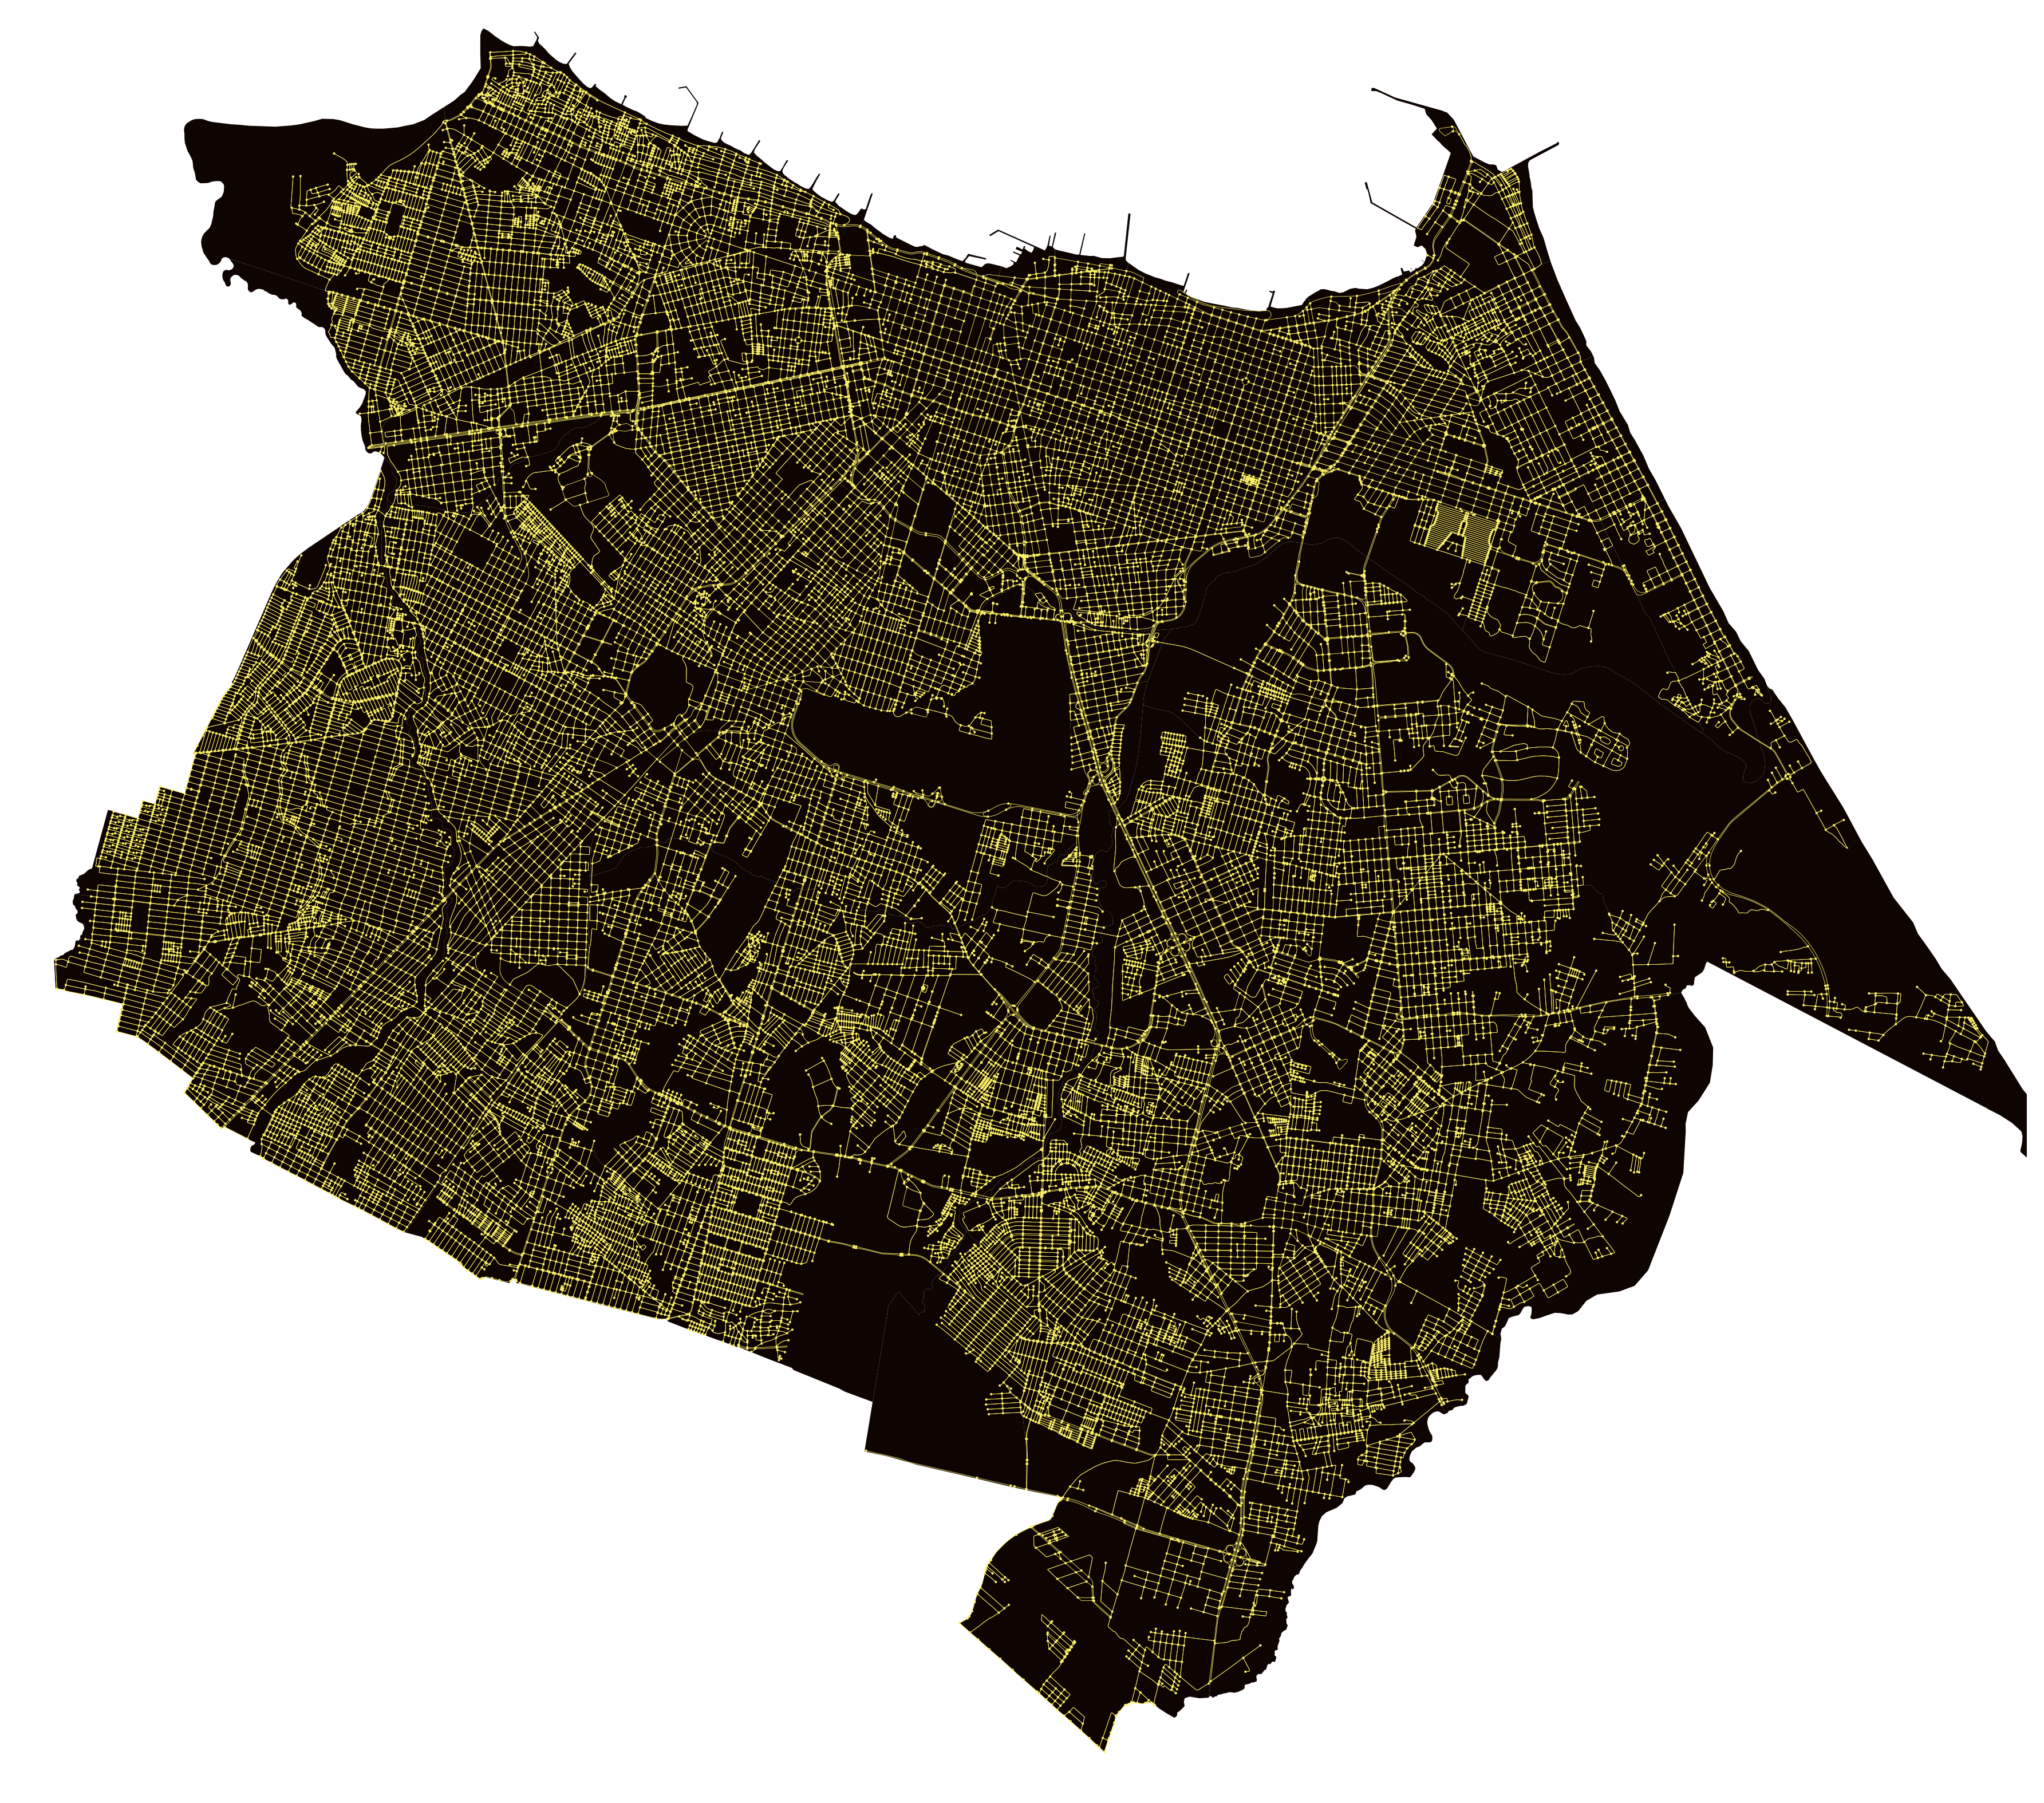

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
from shapely import wkt
df = pd.read_csv('./Densidade_Populacional_por_Bairros.csv')
df['multipolygon'] = df['The_geom'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, geometry='multipolygon')

# Define o sistema de referência de coordenadas (CRS). Substitua 'EPSG:4326' se souber o CRS correto para seus dados
gdf.crs = "EPSG:4326"
# Plota o mapa

# Desenha o grafo com vértices em vermelho e arestas em amarelo
fig, ax = plt.subplots(figsize=(12, 12),dpi = 300)
ox.plot_graph(G,ax = ax, node_color='#faf06b', edge_color='#faf06b', node_size=1, edge_linewidth=0.2,show=False, close=False)

gdf.plot(ax = ax,zorder = 0,color = '#0e0401')
plt.tight_layout()
plt.gca().set_facecolor('none')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.savefig("./img/fortaleza.png",transparent=True)
plt.show()

In [38]:
coordenadas_nos = {node: data['x'] for node, data in G.nodes(data=True)}

In [39]:
coordenadas_nos

{252736052: -38.5833742,
 252736060: -38.5834204,
 252736094: -38.58383,
 252743193: -38.5582403,
 252743195: -38.5590864,
 252743217: -38.5588683,
 252743219: -38.5581201,
 252743286: -38.5465334,
 252749775: -38.5286193,
 252754994: -38.5002438,
 252755043: -38.5046282,
 252755089: -38.5195281,
 253383265: -38.5356239,
 253390789: -38.5170239,
 253390791: -38.5162007,
 253390792: -38.5152943,
 253390797: -38.525619,
 253390807: -38.5163745,
 253390843: -38.5184285,
 253390851: -38.5009177,
 253390853: -38.5007658,
 253390854: -38.5048196,
 253390857: -38.5047959,
 253390865: -38.5005113,
 253390880: -38.5128274,
 253390882: -38.513479,
 253390883: -38.5137173,
 253390885: -38.5136327,
 253390901: -38.5157788,
 253390942: -38.513394,
 253390945: -38.5148619,
 253390948: -38.5060939,
 253390949: -38.5048947,
 253390958: -38.5140753,
 253390959: -38.514312,
 253390963: -38.5152963,
 253390964: -38.5177746,
 253390965: -38.5145785,
 253390985: -38.5159438,
 253390993: -38.5143338,
 25340

In [31]:
gdf

Name                  descriptio timestamp begin   end   
0            AEROLANDIA  Área: 1.10km² / Regional 6      None  None  None  \
1             AEROPORTO  Área: 6.85km² / Regional 4      None  None  None   
2        ALAGADICO NOVO  Área: 3.15km² / Regional 6      None  None  None   
3               ALDEOTA  Área: 3.90km² / Regional 2      None  None  None   
4       ALTO DA BALANCA  Área: 0.92km² / Regional 6      None  None  None   
..                  ...                         ...       ...   ...   ...   
111         VILA ELLERY  Área: 0.46km² / Regional 1      None  None  None   
112  VILA MANOEL SATIRO  Área: 3.08km² / Regional 5      None  None  None   
113           VILA PERY  Área: 1.50km² / Regional 4      None  None  None   
114          VILA UNIAO  Área: 1.46km² / Regional 4      None  None  None   
115          VILA VELHA  Área: 7.01km² / Regional 1      None  None  None   

    altitudeMo  tessellate  extrude  visibility drawOrder  icon   
0         None          -1        0          -1      None  None  \
1         None          -1        0          -1      None  None   
2         None          -1        0          -1      None  None   
3         None          -1        0          -1      None  None   
4         None          -1        0          -1      None  None   
..         ...         ...      ...         ...       ...   ...   
111       None          -1        0          -1      None  None   
112       None          -1        0          -1      None  None   
113       None          -1        0          -1      None  None   
114       None          -1        0          -1      None  None   
115       None          -1        0          -1      None  None   

                                              geometry  
0    POLYGON Z ((-38.51460 -3.77930 0.00000, -38.51...  
1    POLYGON Z ((-38.52860 -3.76040 0.00000, -38.52...  
2    POLYGON Z ((-38.47942 -3.80199 0.00000, -38.47...  
3    POLYGON Z ((-38.51754 -3.73891 0.00000, -38.51...  
4    POLYGON Z ((-38.51716 -3.76997 0.00000, -38.51...  
..                                                 ...  
111  POLYGON Z ((-38.56508 -3.72718 0.00000, -38.56...  
112  POLYGON Z ((-38.59422 -3.80752 0.00000, -38.59...  
113  POLYGON Z ((-38.57461 -3.79085 0.00000, -38.57...  
114  POLYGON Z ((-38.54080 -3.76369 0.00000, -38.54...  
115  POLYGON Z ((-38.59559 -3.72556 0.00000, -38.59...  

[116 rows x 12 columns]